# Обучение модели и генерация отчёта

In [1]:
import sys
from pathlib import Path
from sklearn.metrics import classification_report

In [2]:
project_root = Path().resolve().parent

if str(project_root) not in sys.path:
    sys.path.insert(0, str(project_root))


## Загрузка и разделение данных

In [3]:
# Загрузка
from src.data.make_dataset import load_data


df = load_data()

df.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [4]:
# Разделение
from src.data.make_dataset import split_data


X_train, X_test, y_train, y_test = split_data(df)
print(f"Размер обучающей выборки: {X_train.shape}")
print(f"Размер тестовой выборки: {X_test.shape}")

Размер обучающей выборки: (156, 22)
Размер тестовой выборки: (39, 22)


## Кросс-валидация на полных данных

In [5]:
from src.models.train_pipeline import cross_validate_model


X = df.drop(columns=["status"])
y = df["status"]

cv_mean, cv_std = cross_validate_model(X, y, cv_folds=5)
print(f"Средняя точность (5-fold CV): {cv_mean:.2%} ± {cv_std:.2%}")

Средняя точность (5-fold CV): 93.85% ± 2.05%


## Обучение модели и оценка на тестовой выборке

In [6]:
from src.models.train_pipeline import train_and_evaluate


pipeline, test_acc, y_pred = train_and_evaluate(X_train, X_test, y_train, y_test)
print(f"Точность на тесте: {test_acc:.2%}")

Точность на тесте: 92.31%


In [7]:
# Текстовый classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=["Здоров", "Болен"]))

Classification Report:
              precision    recall  f1-score   support

      Здоров       0.89      0.80      0.84        10
       Болен       0.93      0.97      0.95        29

    accuracy                           0.92        39
   macro avg       0.91      0.88      0.90        39
weighted avg       0.92      0.92      0.92        39



## Визуализация метрик

In [8]:
from src.visualization.visualize import(
    plot_confusion_matrix,
    plot_classification_report_heatmap,
    )

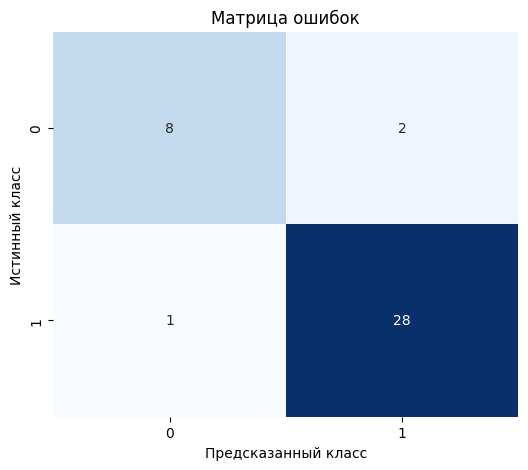

PosixPath('/home/mojusei/Data/ML/parkisnons-detection/reports/figures/04_confusion_matrix.png')

In [9]:
# Матрица ошибок
plot_confusion_matrix(y_test, y_pred)

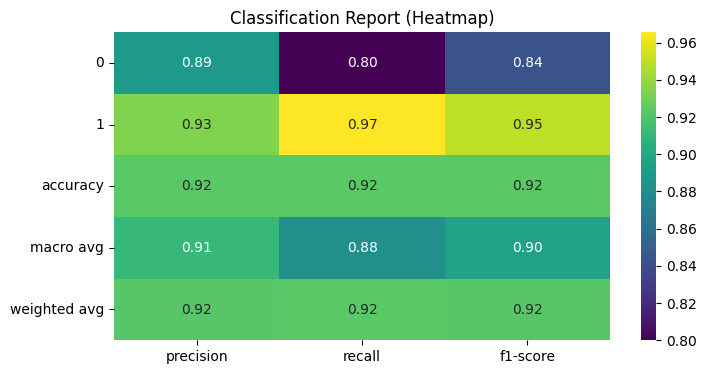

PosixPath('/home/mojusei/Data/ML/parkisnons-detection/reports/figures/05_classification_report.png')

In [10]:
# Classification report как heatmap
plot_classification_report_heatmap(y_test, y_pred)

## Важность признаков

In [11]:
from src.models.train_pipeline import get_feature_importance


feature_names = X.columns.tolist()
importance = get_feature_importance(pipeline, feature_names)

In [12]:
# Сохранение в CSV
from src.models.io import save_feature_importance


save_feature_importance(importance, filename="parkinsons_feature_importance.csv")
print("Важность признаков сохранена в reports/feature_importance.csv")

Важность признаков сохранена в reports/feature_importance.csv


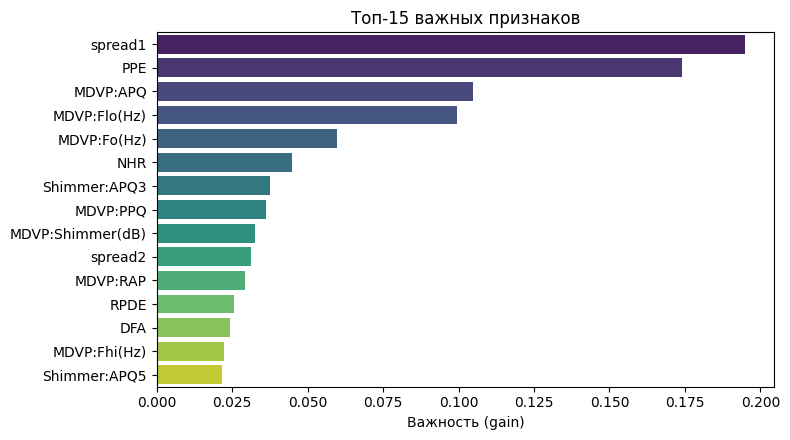

PosixPath('/home/mojusei/Data/ML/parkisnons-detection/reports/figures/06_feature_importance.png')

In [13]:
# График
from src.visualization.visualize import plot_feature_importance


plot_feature_importance(importance, top_n=15)

## Сохранение модели

In [14]:
from src.models.io import save_model


model_path = save_model(pipeline, model_name="parkinsons_xgb.joblib")
print(f"Модель сохранена: {model_path}")

Модель сохранена: /home/mojusei/Data/ML/parkisnons-detection/models/model.joblib/parkinsons_xgb.joblib
